In [1]:
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
import pandas
import seaborn
import matplotlib.pyplot as plt
# %matplotlib inline


Bad key "“backend" on line 1 in
/Users/guillermo/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


#### Mask the dataset creation for educational purposes (viewer: do not open)

In [2]:
data, labels = datasets.make_classification(n_samples=100, n_features=5, n_classes=2, n_informative=3, n_redundant=0, n_repeated=0, random_state=7)

#### Frame the data with features names for educational purposes

In [3]:
df_data = pandas.DataFrame(data, columns=['comms', 'remote access', 'weather', 'external partners', 'physical access'])
df_labels = pandas.DataFrame(labels, columns=['go/no-go criterion']) # go=0, no-go=1
dataset = pandas.concat([df_data, df_labels], axis=1)  # put observations and label data together
dataset.head()  # view some of the data for sanity check

,comms,remote access,weather,external partners,physical access,go/no-go criterion
0,0.803228,-1.719388,-0.771794,-0.337491,2.766993,1
1,2.386229,0.432278,-0.261445,-1.076436,2.318828,1
2,-0.752438,-1.515338,0.461747,-0.901231,-1.188724,0
3,-0.753555,-1.179283,-0.940821,-0.670618,-1.288896,0
4,0.491539,-1.420062,-0.532363,0.502583,-0.419785,1


#### We must now create a two datasets, one for training and another for testing the model afterwards. 

The training dataset provides our model with examples of the domain we are trying to capture and have the model learn some predicitive or classification capailities. 

This testing dataset will inform us how well the model performs on data it hasn't seen before, but is still within the domain in which we trained on. So we wouldn't train a model on identifying fruits and then test it on identifying cars. But the point of the testing data is to see how the model predict or classify in a general sense since this dataset is unseen examples. 

One point must be made. The fundamental assumption for machine learning practicioners is that our training and testing dataset represent the real-world (real domain) that we are trying to learn on. 

So below we split the whole dataset we have; 80% for training and 20% for testing. 

In [4]:
data_train, data_test, labels_train, labels_test = model_selection.train_test_split(df_data, df_labels, test_size=0.2, random_state=7)

#### Let's see the training set that is recently split up now

In [5]:
data_train.head()

,comms,remote access,weather,external partners,physical access
50,-0.278772,1.253518,0.970635,-0.331657,0.197515
2,-0.752438,-1.515338,0.461747,-0.901231,-1.188724
17,-4.469309,2.173942,1.134294,-0.159276,0.479370
85,2.860472,1.454695,-0.302301,-0.084685,-3.255675
5,1.223636,0.462238,-0.251150,-0.829372,-1.157077


In [6]:
labels_train.head()

,go/no-go criterion
50,1
2,0
17,0
85,1
5,1


In [7]:
data_train.shape, labels_train.shape

((80, 5), (80, 1))

#### And let's view the testing set that is recently split up now

In [8]:
data_test.head()

,comms,remote access,weather,external partners,physical access
37,-0.602741,-1.092022,1.622082,-1.096845,-1.385741
26,-0.126339,1.887747,0.216027,0.545661,0.415689
78,-0.534865,-0.321223,-0.429857,-0.062784,-0.878018
91,-0.938781,-1.372686,0.080992,-1.661526,-0.691339
49,-1.555261,0.034015,-0.582048,-0.403571,1.969811


In [9]:
labels_test.head()

,go/no-go criterion
37,0
26,1
78,1
91,1
49,0


In [10]:
data_test.shape, labels_test.shape

((20, 5), (20, 1))

#### Now we finally create a Decision Tree model and use our training dataset for the model to learn

In [21]:
my_decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=7)
my_decision_tree

DecisionTreeClassifier(criterion='entropy', random_state=7)

#### Using the Scikit Learn library we can train this model using its built-in `fit` function

The fit function automatically trains our model. Isn't this a neat and easy implementation for us!

In [26]:
my_decision_tree.fit(X=data_train, y=labels_train)
my_decision_tree

DecisionTreeClassifier(criterion='entropy', random_state=7)

#### That's it? What does it know right now? The Scikit Learn library has tools that enable us to visualize what the model has learned and how it will decide based on its internal function it developed. 

In [15]:
from sklearn import tree

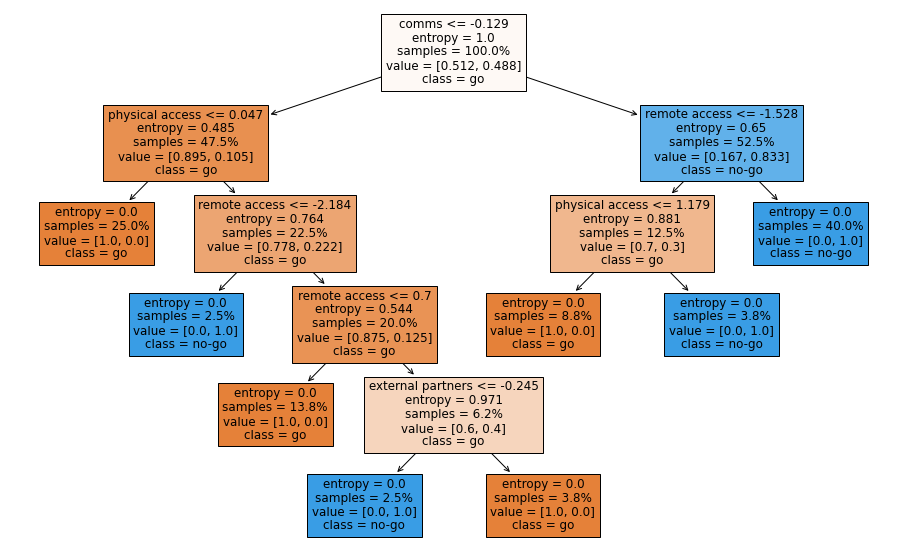

In [16]:
plt.figure(figsize=(16,10))
tree.plot_tree(my_decision_tree, feature_names=data_train.columns, class_names=['go', 'no-go'], filled=True, proportion=True)
plt.show()

## Comments on the graph above

First of all, the squares at the end of each tree branch are called leaf nodes. Each of these leaf nodes have a "parent node," and the top-most node is called the root node. 

 ***The root node*** <br>The root node contains the `comms` feature as its initial decision point. Why?


The decision tree first determines which feature it should start with by using a metric to compare all other features relative to the go/no-go classification. In our model we used entropy

Entropy comes from [information theory](https://en.wikipedia.org/wiki/Entropy_(information_theory)) and we'll use this metric on features to determine which one provides more information relative to the classification (i.e. go/no-go) and make it a decision pivot point (parent node). In our binary classification case of "go/no-go" the entropy equation will be as follows:

$Entropy(S) =  -p_g \log_2(p_g) - p_n \log_2(p_n)$

where <br>
$p_g = \frac{\text {number of Go's}}{\text {total number of observations in S}}$
$p_n = \frac{\text {number of No-Go's}}{\text {total number of observations in S}}$, 
and `S` is a set of observations (i.e. a group of examples)

For example, if we have 14 examples in `S` of feature `comms` and 9 of them were labeled "go" and the other 5 were labeled "no-go", then the proportions are 9/14 (64%) Go's and 5/14 (36%) No-Go's. The Entropy equation results in </br>
$Entropy_\text{comms}(S) = -\frac{9}{14} \log_2 (\frac{9}{14}) - \frac{5}{14} \log_2(\frac{5}{14}) = 0.940$

Now the Information Gain equation will use the Entropy metric on all of the features to determine which one results in the most information. The equation is as follows: </br>
$Gain(S, F) = Entropy(S)  - \displaystyle\sum_{v \in \text{values in features F}} \frac{S_v}{S} Entropy(S_v) $ </br>
All this is saying is that we take the entropy of the whole set of observation `S` and subtract it from the entropy relative to the feature at hand. </br>

Let's continue the example above to include features to illustrate. We know $Entropy(S)=0.94$, given 9 Go's and 5 No-Go's. 
$S = \{9 \mbox{Go's}\} \{5 \mbox{No-Go's}\} = 0.94$ </br>
Note there are 14 total </br>
Let's say that for the `weather` feature it can either take the value of `good` or `bad` and in this set `S` there were: </br>
$S_\text{weather=good} = \{6 \mbox{Go's}\} \{2 \mbox{No-Go's}\} $ <br>
$S_\text{weather=bad} = \{3 \mbox{Go's}\} \{3 \mbox{No-Go's}\} $ <br>
Note that 8 total for good weather, and 6 total for bad weather <br>
The information gain here would be: </br>
$Gain(S, \text{Weather}) = Entropy(S)  - \displaystyle\sum_{v \in \text{Good | Bad}} \frac{S_v}{S} Entropy(S_v) $ <br>
$Gain(S, \text{Weather}) = Entropy(S) - (\frac{8}{14})Entropy(S_\text{weather=good}) - (\frac{6}{14})Entropy(S_\text{weather=bad})$ <br>
$Gain(S, \text{Weather}) = 0.94 - (\frac{8}{14})(0.811) - (\frac{6}{14})(1.00)$ <br>
$Gain(S, \text{Weather}) = 0.048 $ <br>

And so we would do this to all other features and choose the higher value. In our decision tree above we see that the `comms` entropy information gain was 1.0, and so if we compared it to this weather example above `comms` would win as well. [Reference](https://www.amazon.com/Machine-Learning-Tom-M-Mitchell/dp/0070428077) Tom Mitchell, Machine Learning

In [17]:
avg_accuracy = my_decision_tree.score(X=data_test, y=labels_test)
print('Average Accuracy: {}%'.format(avg_accuracy * 100))

Average Accuracy: 80.0%


In [18]:
from sklearn.metrics import plot_confusion_matrix

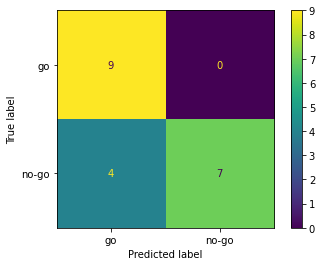

In [19]:
plot_confusion_matrix(my_decision_tree, X=data_test, y_true=labels_test, display_labels=['go', 'no-go'])

#### (above) From the perspective of our model's prediction capability (columns), it did 9 correctly for `go` and mistakenly said `go` for 4 actual `no-go`s

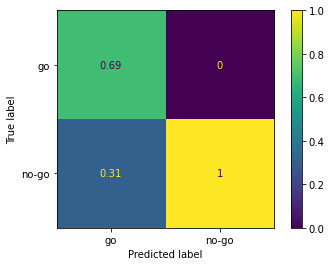

In [20]:
plot_confusion_matrix(my_decision_tree, X=data_test, y_true=labels_test, display_labels=['go', 'no-go'], normalize='pred')

#### (above) This graph is the same but normalized based on the model's prediction (columns), and tell us that over this test dataset our model got "confused" 31% of the time in deciding to "go" as appropriate ***relative to the data***, whereas it was 100% not-confused for saying no-go

### How can we understand more about our data to possibly know which features are informative? How can we determine which features are relevant to the machine learning model?

### Lets jump to the `data-analysis-1` notebook to learning about informative features and some data structure. 

### Afterwards we'll jump to `feature-to-model-analysis-1` to determine what features are relavant to the machine learning model. 
